In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
def naive_roc_auc_score(y_true, y_pred):
  
  y_true = y_true.to_numpy()
  
  num_same_sign = 0
  num_pairs = 0
  
  for a in range(len(y_true)):
    for b in range(len(y_true)):
      if y_true[a] > y_true[b]:
        num_pairs += 1
        if y_pred[a] > y_pred[b]:
          num_same_sign += 1
        elif y_pred[a] == y_pred[b]:
          num_same_sign += .5
        
  return num_same_sign / num_pairs

# score = make_scorer(naive_roc_auc_score, greater_is_better=True)

In [3]:
def create_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(10, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 # Compile model
 opt = optimizers.Adam(learning_rate=0.005)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [19]:
data = pd.read_csv('Full_Descriptors.csv')

# get data
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Heavy Atom Molecular Weight', 'Max Absolute Partial Charge', 'Max Partial Charge', 
         'Min Abs Partial Charge', 'Min Partial Charge', 'Radical Electrons', 'Valence Electrons', 'NHOH Count', 'NO Count',
         'H Acceptors', 'H Donors', 'Ring Count', 'Aliphatic Rings', 'Aromatic Rings', 'Saturated Rings', 'Aromatic Carbocycles',
         'Aromatic Heterocycles', 'Heteroatoms', 'Rotatable Bonds', 'Saturated Carbocycles', 'Saturated Heterocycles', 'H Count',
         'C Count', 'N Count', 'F Count', 'Halogen Count', 'Double Bonds', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [5]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 20, 'epochs': 100}
CV score for GS -0.7398694211119758
Train AUC ROC Score for GS:  0.6271643448148246
Test AUC ROC Score for GS:  0.4792024013722127
Train Mean Absolute Error: 187    0.004532
140    0.000556
289    0.014193
315    0.012173
294    0.006349
         ...   
124    0.054705
321    0.008545
16     0.013811
126    0.016506
266    0.009879
Name: LUMO, Length: 279, dtype: float64 degrees.
Test Mean Absolute Error: 173    0.018128
112    0.015325
98     0.000832
190    0.002972
57     0.001017
         ...   
195    0.005654
79     0.010459
101    0.002398
209    0.010656
127    0.013081
Name: LUMO, Length: 70, dtype: float64 degrees.
Train R2:  -0.4827871348060151
Test R2:  -1.1011341266395798
Train MSE:  0.00033056630550083017
Test MSE:  0.0002043846061472427


In [4]:
def create_new_model():
 # create model
 model = Sequential()
 model.add(Dense(29, input_shape=(29,), activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(30, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.4))
 model.add(BatchNormalization())
 model.add(Dense(20, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.4))
 model.add(Dense(10, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 model.add(BatchNormalization())
 # Compile model
 opt = optimizers.Adam(learning_rate=0.002)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [21]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_new_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 20, 'epochs': 100}
CV score for GS 0.45586307274023086
Train AUC ROC Score for GS:  0.8302096275344313
Test AUC ROC Score for GS:  0.7356346483704974
Train Mean Absolute Error: 187    0.001411
140    0.003026
289    0.003553
315    0.002367
294    0.003156
         ...   
124    0.030651
321    0.000983
16     0.000717
126    0.007135
266    0.008203
Name: LUMO, Length: 279, dtype: float64 degrees.
Test Mean Absolute Error: 173    0.006925
112    0.000530
98     0.003367
190    0.005029
57     0.001602
         ...   
195    0.009076
79     0.000216
101    0.013346
209    0.010124
127    0.006755
Name: LUMO, Length: 70, dtype: float64 degrees.
Train R2:  0.6751971644223822
Test R2:  0.27053683922830063
Train MSE:  7.241017328298657e-05
Test MSE:  7.095741243882098e-05


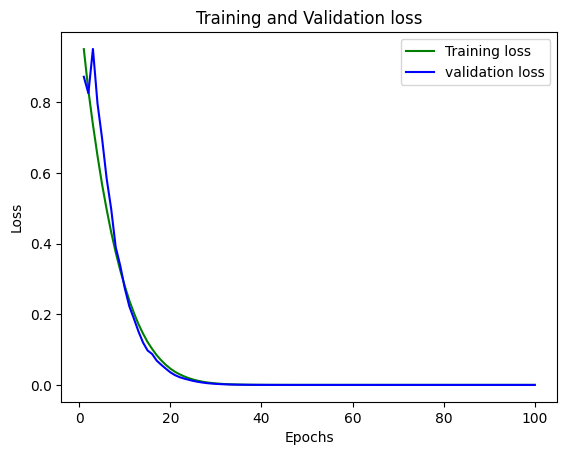

In [22]:
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
loss_train = model.history_['loss']
loss_val = model.history_['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
data = pd.read_csv('Full_Descriptors.csv')

# get data
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
y = data['LUMO']
X = data.loc[:, ['Molecular Weight', 'Max Absolute Partial Charge', 
         'Min Abs Partial Charge', 'Valence Electrons', 'Rotatable Bonds', 'N Count', 'Triple Bonds']]
list_numerical = X.columns


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [5]:
def create_alt_model():
 # create model
 model = Sequential()
 model.add(Dense(7, input_shape=(7,), activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(7, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.3))
 model.add(Dense(5, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.4))
 model.add(BatchNormalization())
 model.add(Dense(5, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dropout(rate=0.4))
 model.add(Dense(3, activation='elu'))
 model.add(BatchNormalization())
 model.add(Dense(1))
 model.add(BatchNormalization())
 # Compile model
 opt = optimizers.Adam(learning_rate=0.002)
 model.compile(loss='MeanSquaredError', optimizer=opt, metrics=['accuracy'])
 return model

In [7]:
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasRegressor(model=create_alt_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_cv = grid.fit(X_train, y_train)
# summarize results
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", naive_roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ",naive_roc_auc_score(y_test, grid_cv.predict(X_test)))
print('Train Mean Absolute Error:', abs(grid_cv.predict(X_train) - y_train), 'degrees.')
print('Test Mean Absolute Error:', abs(grid_cv.predict(X_test) - y_test), 'degrees.')

# prediction = model.predict(X_test)
# mse = mean_squared_error(y_test, prediction)
# #calculate R-squared of regression model
# r_squared = model.score(X_test, y_test)

#view R-squared value
print("Train R2: ", r2_score(y_train, grid_cv.predict(X_train)))
print("Test R2: ", r2_score(y_test, grid_cv.predict(X_test)))
# rmse = mse**.5
print("Train MSE: ", mean_squared_error(y_train, grid_cv.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, grid_cv.predict(X_test)))

Param for GS {'batch_size': 10, 'epochs': 100}
CV score for GS -7.550308971315605
Train AUC ROC Score for GS:  0.4870734092891697
Test AUC ROC Score for GS:  0.4569039451114923
Train Mean Absolute Error: 187    0.081926
140    0.084544
289    0.066105
315    0.066747
294    0.082862
         ...   
124    0.018285
321    0.034479
16     0.046237
126    0.063125
266    0.044577
Name: LUMO, Length: 279, dtype: float64 degrees.
Test Mean Absolute Error: 173    0.022772
112    0.068143
98     0.069999
190    0.061005
57     0.071678
         ...   
195    0.085037
79     0.059383
101    0.067203
209    0.080990
127    0.071336
Name: LUMO, Length: 70, dtype: float64 degrees.
Train R2:  -18.28758698422636
Test R2:  -40.24787340806601
Train MSE:  0.004299893236014434
Test MSE:  0.0040123237512695075


In [9]:
loss_train = model.history_['loss']
loss_val = model.history_['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

AttributeError: 'KerasRegressor' object has no attribute 'history_'